In [2]:
import pandas as pd 

In [3]:
# Load dataset:
df=pd.read_csv('C:\\DataAnalytics\\Projects\\EdaProject1\\new_bank_fraud_detection.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               200000 non-null  int64  
 1   Gender                   200000 non-null  object 
 2   Age                      200000 non-null  int64  
 3   State                    200000 non-null  object 
 4   Bank_Branch              200000 non-null  object 
 5   Account_Type             200000 non-null  object 
 6   Transaction_ID           200000 non-null  object 
 7   Transaction_Date         200000 non-null  object 
 8   Transaction_Time         200000 non-null  object 
 9   Transaction_Amount       200000 non-null  float64
 10  Merchant_ID              200000 non-null  object 
 11  Transaction_Type         200000 non-null  object 
 12  Merchant_Category        200000 non-null  object 
 13  Account_Balance          200000 non-null  float64
 14  Tran

In [4]:
# Cleaning the column names:
df.columns = df.columns.str.strip().str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

# Dropping the 'Unnamed0' column:
if 'Unnamed0' in df.columns:
    df.drop('Unnamed0', axis=1, inplace=True)
print(df.columns)


Index(['Gender', 'Age', 'State', 'Bank_Branch', 'Account_Type',
       'Transaction_ID', 'Transaction_Date', 'Transaction_Time',
       'Transaction_Amount', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Transaction_Description'],
      dtype='object')


In [17]:
df

,Gender,Age,State,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,Bitcoin transaction
1,Female,51,Maharashtra,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,Grocery delivery
2,Male,20,Bihar,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,Food delivery
4,Female,43,Punjab,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,18:42:09,98513.74,72817d4a-830b-4d16-bf74-244dccfe4cc4,Credit,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,ATM withdrawal
199996,Male,51,Manipur,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,20:51:21,40593.55,087718f9-1faa-44ef-b162-24d20ddc903c,Withdrawal,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,Subscription box
199997,Female,41,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,10:47:40,61579.70,a313cfbc-ef3d-4e59-8347-a948ac292a6f,Withdrawal,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,Charity donation
199998,Female,28,Telangana,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,06:26:41,39488.22,08ef8813-dea0-42bf-9df5-0a63fe07673d,Debit,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,Tourist attraction payment


In [18]:
# trim space in categorical values:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [19]:
#convert date and time columnns:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format="%d-%m-%Y")
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"],format="%H:%M:%S").dt.time

In [20]:
# Handle the missing values:
missing_values = df.isnull().sum()
print(missing_values)

Gender                     0
Age                        0
State                      0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Transaction_Description    0
dtype: int64


In [21]:
#duplicate rows removed:

df.drop_duplicates(inplace=True)

In [22]:
df.to_csv('cleaned_bank_fraud_data.csv',index=False)

In [ ]:
# 1. which transaction type occurs most frequently?:
most_frequent_transaction = df.groupby("Transaction_Type")["Transaction_ID"].agg("count").idxmax()
print("Most Frequent Transaction Type:", most_frequent_transaction)



Most Frequent Transaction Type: Credit


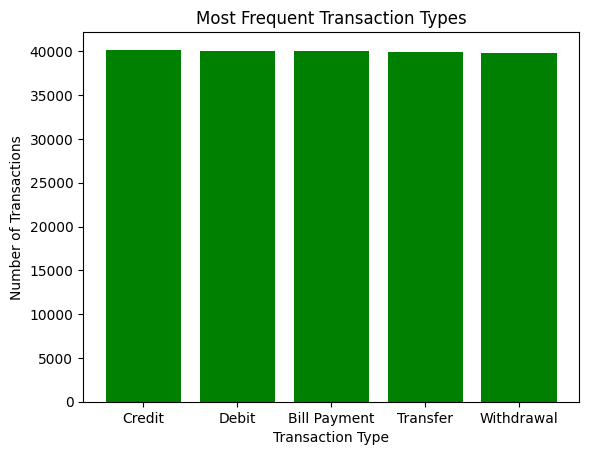

In [24]:
import matplotlib.pyplot as plt 
transaction_counts = df["Transaction_Type"].value_counts()
plt.bar(transaction_counts.index, transaction_counts.values, color="green")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Most Frequent Transaction Types")
plt.show()

In [25]:
#2. on which day do more transaction occur?:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format="%d-%m-%Y")
df["Transaction_Date"].dt.day_name().value_counts().idxmax()


'Thursday'

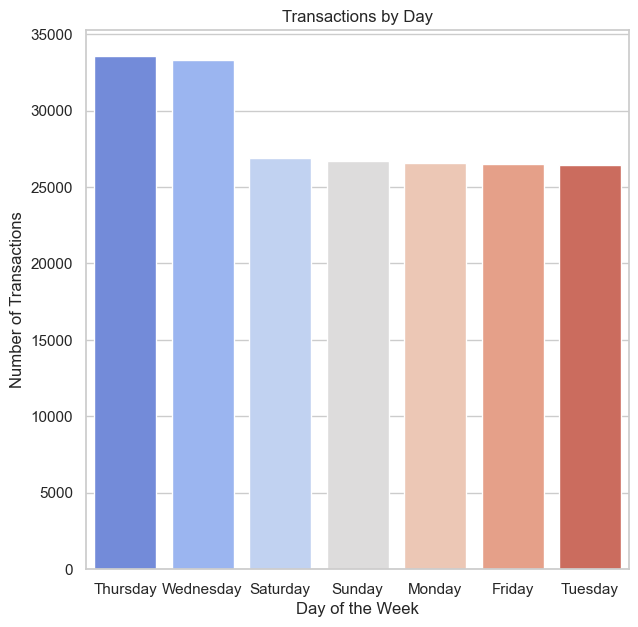

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format="%d-%m-%Y")
df["Day_Name"] = df["Transaction_Date"].dt.day_name()

day_counts = df["Day_Name"].value_counts().reset_index()
day_counts.columns = ["Day_Name", "Transaction_Count"]

plt.figure(figsize=(7, 7))
sns.barplot(data=day_counts, x="Day_Name", y="Transaction_Count", hue="Day_Name", palette="coolwarm", legend=False)

plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Day")

plt.show()


In [27]:
#3. which bank branch process more transcation?:
df["Bank_Branch"].value_counts().idxmax()



'Chandigarh Branch'

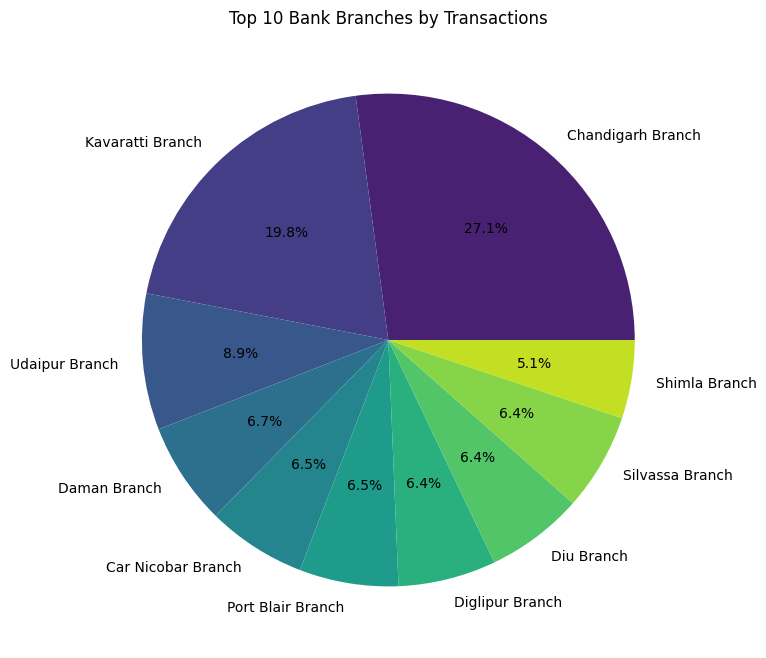

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt
branch_counts = df["Bank_Branch"].value_counts().reset_index()
branch_counts.columns = ["Bank_Branch", "Transaction_Count"]
top_branches=branch_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_branches["Transaction_Count"], labels=top_branches["Bank_Branch"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(top_branches)))
plt.title("Top 10 Bank Branches by Transactions")
plt.show()





In [29]:
#4. what is the total transaction amount for each account type?:
df.groupby("Account_Type")["Transaction_Amount"].mean()


Account_Type
Business    49649.435313
Checking    49646.348643
Savings     49317.908284
Name: Transaction_Amount, dtype: float64

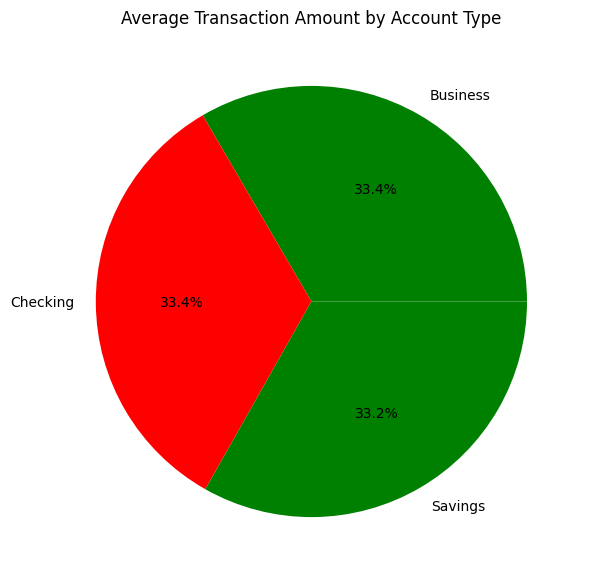

In [30]:
import matplotlib.pyplot as plt 
account_means=df.groupby("Account_Type")["Transaction_Amount"].mean()
plt.figure(figsize=(7, 7))
plt.pie(account_means, labels=account_means.index, autopct="%1.1f%%", colors=["green", "red"])
plt.title("Average Transaction Amount by Account Type")

plt.show()

In [31]:
#5. Which device type is most commonly used in fraudulent transactions?:
df.groupby("Device_Type")["Is_Fraud"].mean().idxmax()


'Desktop'

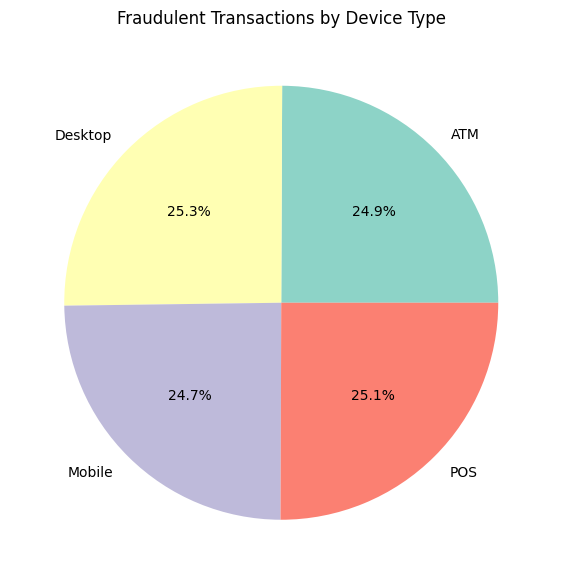

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns  
fraud_by_device = df.groupby("Device_Type")["Is_Fraud"].mean()
colors = sns.color_palette("Set3", len(fraud_by_device))
plt.figure(figsize=(7, 8))
plt.pie(fraud_by_device,labels=fraud_by_device.index,  autopct="%1.1f%%", colors=colors)
plt.title("Fraudulent Transactions by Device Type")
plt.show()















In [33]:
#6. How do customer spending habits differ by gender?:
df.groupby("Gender")["Transaction_Amount"].sum()


Gender
Female    4.927220e+09
Male      4.980384e+09
Name: Transaction_Amount, dtype: float64

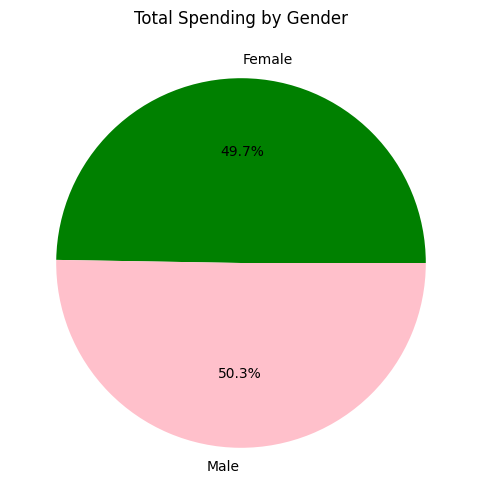

In [34]:
import matplotlib.pyplot as plt
gender_spending = df.groupby("Gender")["Transaction_Amount"].sum()
plt.figure(figsize=(6, 6))
plt.pie(gender_spending, labels=gender_spending.index, autopct="%1.1f%%", colors=["green", "pink"])
plt.title("Total Spending by Gender")
plt.show()





In [35]:
#7. which merchant category has the most fraud cases?:
df.groupby('Merchant_Category')['Transaction_Amount'].median()

Merchant_Category
Clothing         49486.71
Electronics      49464.78
Entertainment    49655.36
Groceries        49496.58
Health           49412.20
Restaurant       49489.18
Name: Transaction_Amount, dtype: float64

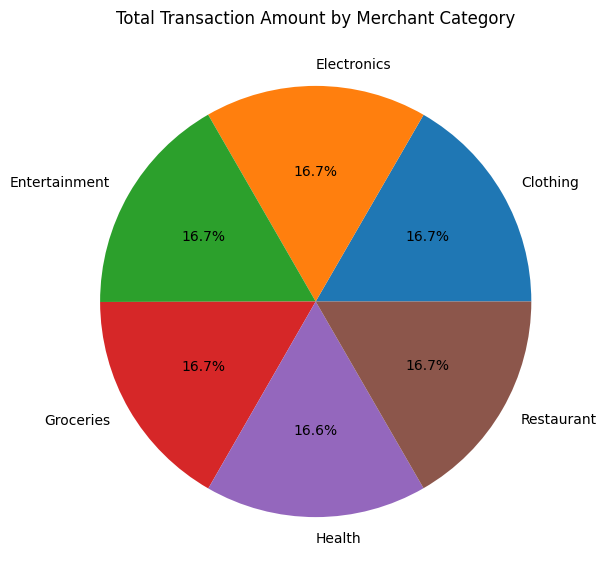

In [36]:
import matplotlib.pyplot as plt
merchant_spending = df.groupby("Merchant_Category")["Transaction_Amount"].median()
plt.figure(figsize=(7, 7))
plt.pie(merchant_spending, labels=merchant_spending.index, autopct="%1.1f%%")
plt.title("Total Transaction Amount by Merchant Category")
plt.show()







In [37]:
#8. what is total amount lost due to fraudulent transactions?:
df.groupby("Is_Fraud")['Transaction_Amount'].mean()

Is_Fraud
0    49551.831380
1    49277.925242
Name: Transaction_Amount, dtype: float64

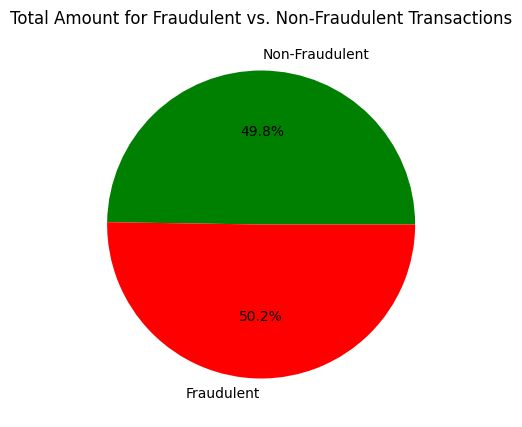

In [38]:
import matplotlib.pyplot as plt
fraud_labels=['Non-Fraudulent','Fraudulent']
fraud_values=[2547.677056, 2572.235527]
plt.figure(figsize=(6,5))
plt.pie(fraud_values, labels=fraud_labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title("Total Amount for Fraudulent vs. Non-Fraudulent Transactions")
plt.show()

In [39]:
#9. How does total transcation amount vary by day of week?:
df["Transaction_Date"]=pd.to_datetime(df['Transaction_Date'])
df.pivot_table(values='Transaction_Amount',index=df['Transaction_Date'].dt.day_name(),aggfunc='mean')

,Transaction_Amount
Transaction_Date,
Friday,49467.544802
Monday,49353.699498
Saturday,49752.847336
Sunday,49562.221948
Thursday,49375.104464
Tuesday,49590.266971
Wednesday,49670.862861


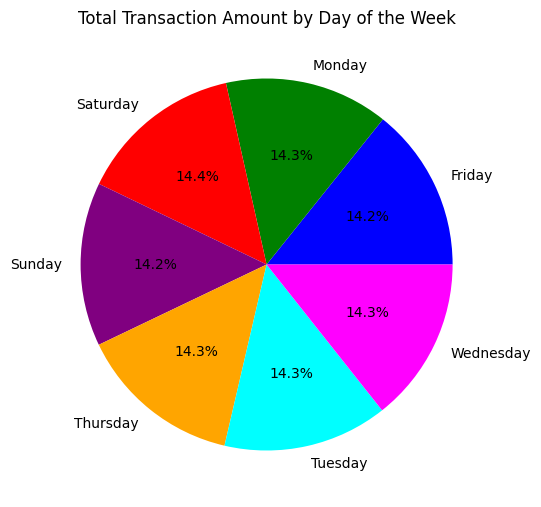

In [40]:
import matplotlib.pyplot as plt 
days = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
transaction_amounts = [2541.959006, 2544.325940, 2561.213473, 2539.882333, 2544.621899, 2550.780934, 2558.266737]
plt.figure(figsize=(6,7))
plt.pie(transaction_amounts, labels=days, autopct="%1.1f%%", colors=["blue", "green", "red", "purple", "orange", "cyan", "magenta"])
plt.title("Total Transaction Amount by Day of the Week")
plt.show()

In [41]:
#10. which is the most common transcation currency?:
most_common_currency = df.groupby("Transaction_Currency").size().idxmax()
print(most_common_currency)




INR


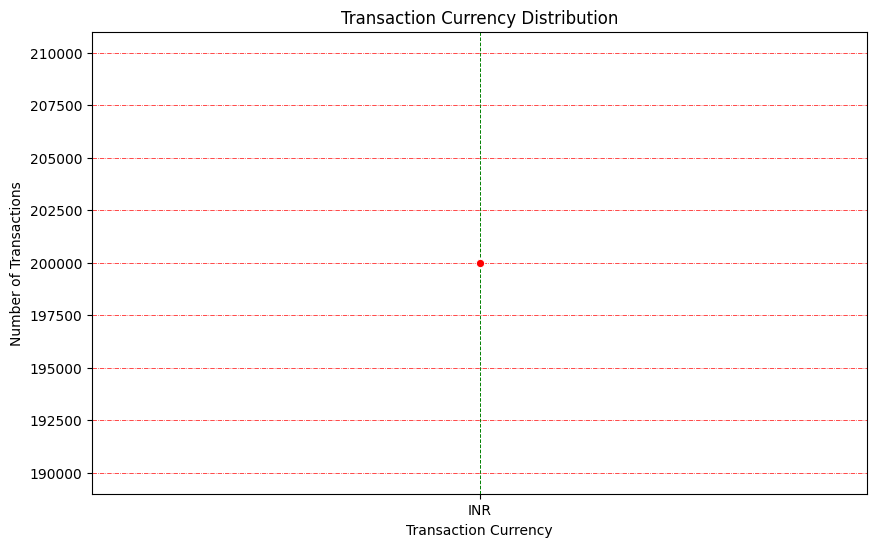

In [42]:
import matplotlib.pyplot as plt  
import seaborn as sns  
currency_counts = df["Transaction_Currency"].value_counts()  
plt.figure(figsize=(10, 6))    
sns.lineplot(x=currency_counts.index, y=currency_counts.values, marker="o", color="red")   
plt.xlabel("Transaction Currency")  
plt.ylabel("Number of Transactions")  
plt.title("Transaction Currency Distribution")  
plt.grid(color="green", linestyle="--", linewidth=0.7)   
plt.grid(axis='y', color="red", linestyle="-.", linewidth=0.5) 
plt.show()  


 

In [43]:
#11. what perentage of transactions were happened in  fraudulent and non- fraudlent?:
fraud_percentage=df['Is_Fraud'].value_counts(normalize=True)*100
print(fraud_percentage)


Is_Fraud
0    94.956
1     5.044
Name: proportion, dtype: float64


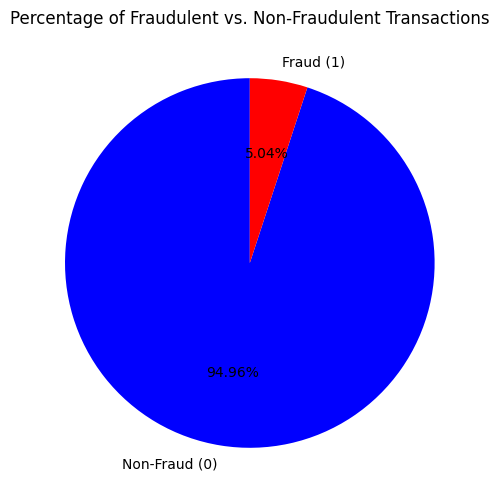

In [44]:
import matplotlib.pyplot as plt
fraud_percentage=df['Is_Fraud'].value_counts(normalize=True)*100
plt.figure(figsize=(6, 6))
plt.pie(fraud_percentage, labels=["Non-Fraud (0)", "Fraud (1)"], autopct="%.2f%%", colors=["blue", "red"], startangle=90)
plt.title("Percentage of Fraudulent vs. Non-Fraudulent Transactions")
plt.show()






In [45]:
#12. How does fraud rate differ across various state or regions?:
fraud_by_state = df.groupby('State')['Is_Fraud'].sum().sort_values(ascending=False)
print(fraud_by_state)


State
Lakshadweep                                 332
Tamil Nadu                                  328
Uttarakhand                                 319
Madhya Pradesh                              315
Telangana                                   315
Mizoram                                     312
Nagaland                                    312
Sikkim                                      312
West Bengal                                 311
Tripura                                     308
Dadra and Nagar Haveli and Daman and Diu    305
Delhi                                       303
Karnataka                                   303
Meghalaya                                   302
Puducherry                                  302
Jharkhand                                   301
Manipur                                     297
Odisha                                      296
Uttar Pradesh                               295
Maharashtra                                 294
Himachal Pradesh                  

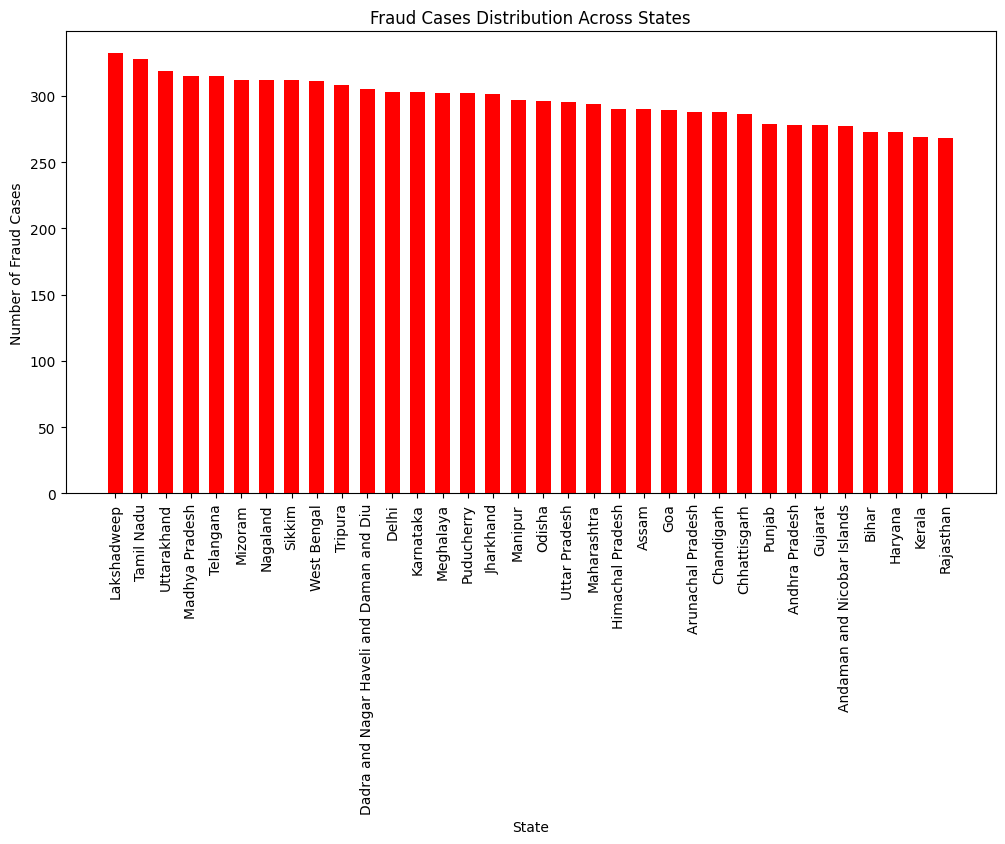

In [48]:
import matplotlib.pyplot as plt
fraud_by_state_df = fraud_by_state.reset_index()
plt.figure(figsize=(12, 6))
plt.bar(fraud_by_state_df['State'], fraud_by_state_df['Is_Fraud'], color='red', width=0.6) 
plt.xlabel("State")
plt.ylabel("Number of Fraud Cases")
plt.title("Fraud Cases Distribution Across States")
plt.xticks(rotation=90)  
plt.show()









In [ ]:
#13. what percentage of fraudalent transaction occurs at each transaction location?:
df.groupby("Transaction_Location")["Is_Fraud"].mean() * 100


Transaction_Location
Agartala, Tripura          4.930047
Agra, Uttar Pradesh        4.987531
Ahmedabad, Gujarat         4.393816
Aizawl, Mizoram            6.136681
Ajmer, Rajasthan           4.191617
                             ...   
Warangal, Telangana        4.888508
West Delhi, Delhi          5.536913
Wokha, Nagaland            5.518170
Yanam, Puducherry          5.762934
Ziro, Arunachal Pradesh    4.812129
Name: Is_Fraud, Length: 148, dtype: float64

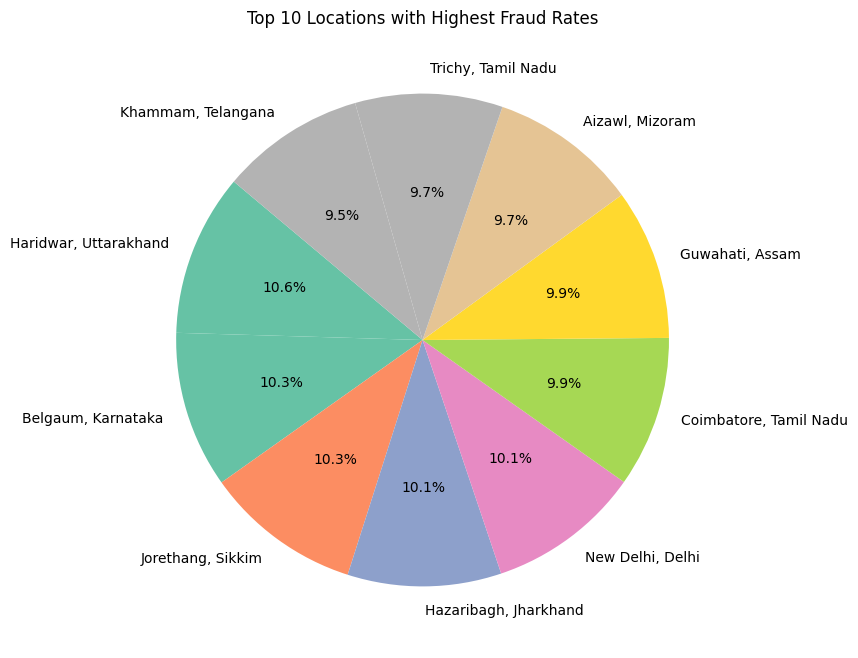

In [ ]:
import matplotlib.pyplot as plt
fraud_rates = df.groupby("Transaction_Location")["Is_Fraud"].mean() * 100
top_fraud_locations = fraud_rates.nlargest(10)
plt.figure(figsize=(8, 8))
top_fraud_locations.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set2")
plt.title("Top 10 Locations with Highest Fraud Rates")
plt.ylabel('')
plt.show()








In [ ]:
#14. Does fraud occur more often in specific states or brank branches?:
df[df['Is_Fraud'] == 1].groupby(['State', 'Bank_Branch']).size()


State                        Bank_Branch       
Andaman and Nicobar Islands  Car Nicobar Branch    97
                             Diglipur Branch       81
                             Port Blair Branch     99
Andhra Pradesh               Guntur Branch         47
                             Nellore Branch        56
                                                   ..
West Bengal                  Asansol Branch        58
                             Durgapur Branch       64
                             Howrah Branch         58
                             Kolkata Branch        67
                             Siliguri Branch       64
Length: 148, dtype: int64

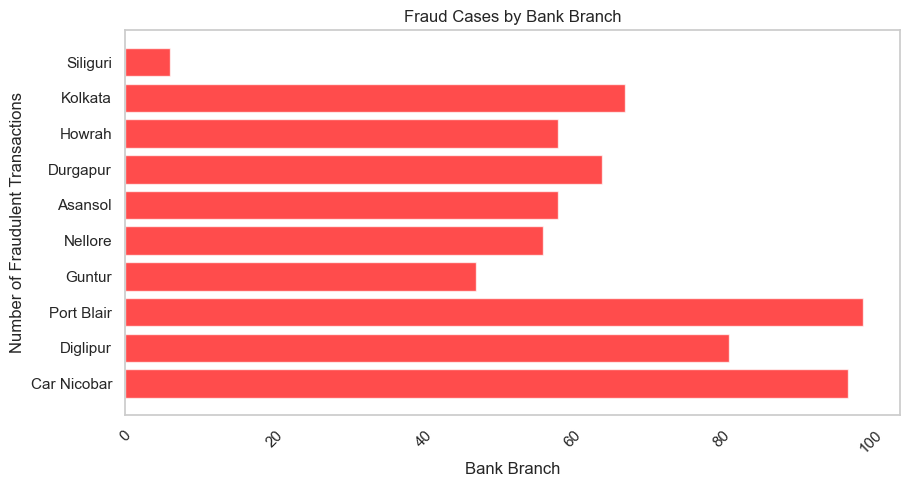

In [14]:

import matplotlib.pyplot as plt  
states=["Andaman & Nicobar", "Andaman & Nicobar", "Andaman & Nicobar",
          "Andhra Pradesh", "Andhra Pradesh", "West Bengal", "West Bengal",
          "West Bengal", "West Bengal", "West Bengal"]
branches = ["Car Nicobar", "Diglipur", "Port Blair", "Guntur", "Nellore",  
            "Asansol", "Durgapur", "Howrah", "Kolkata", "Siliguri"]  
fraud_counts = [97, 81, 99, 47, 56, 58, 64, 58, 67, 6]  
plt.figure(figsize=(10, 5))  
plt.barh(branches, fraud_counts, color='red', alpha=0.7)  
plt.xlabel("Bank Branch")  
plt.ylabel("Number of Fraudulent Transactions")  
plt.title("Fraud Cases by Bank Branch")  
plt.xticks(rotation=45)
plt.grid(False)  
plt.show()  





In [ ]:
#15. Calculate the Pearson correlation between Transaction_Amount and Account_Balance?:
correlation = df['Transaction_Amount'].corr(df['Account_Balance'])
print("Correlation between Transaction_Amount and Account_Balance:", correlation)


Correlation between Transaction_Amount and Account_Balance: -0.0017351974452352046


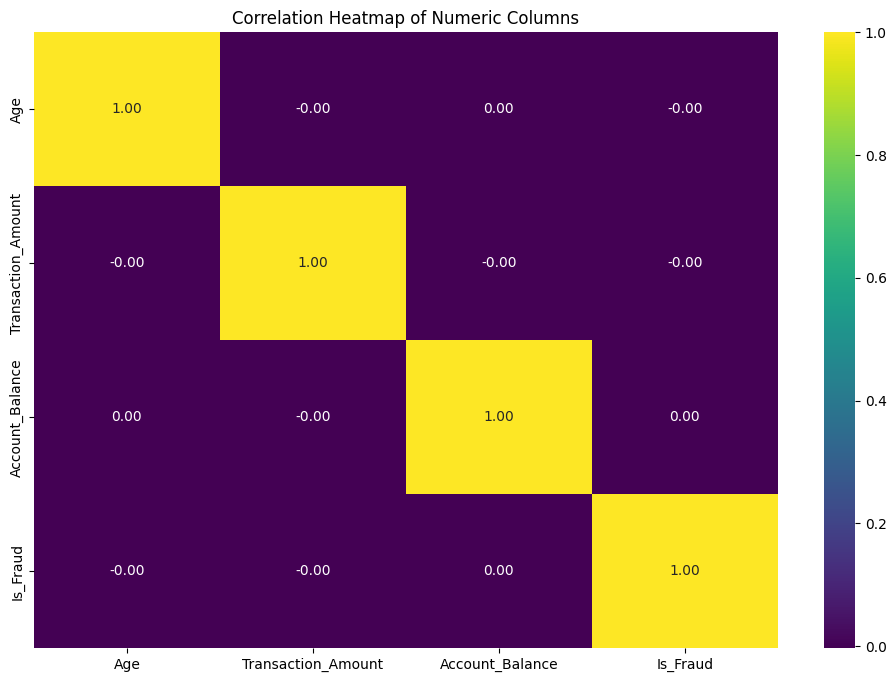

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.select_dtypes(include='number').corr()
colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'RdYlBu', 'coolwarm']
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()



### summary:
# From the first  bar graph it shows that different type of transcation, like credit , debit ,billpayment, and withdrawl.The bars are realtively close in height, suggesting that each transcation type occurs at similar rate with credit appearing slightly more frequently.

# From the another bar chart thursday has the highest volume of transcations followed closely by wednesday.Saturday and Sunday have moderate transaction levels, while Monday, Friday, and Tuesday show slightly lower volumes.

# The   pie chart shows that Chandigarh Branch accounts has  largest share of transactions at 27.1%, followed by Kavaratti Branch at 19.8%. The remaining eight branches shows a smaller proportion under 10%.

# Next pie chart repersent average transaction amount distribution across different account types and the business  and checking amounts have highest share at 33.4% , while savings contribute slightly less.

# Another piechart of figsize(7,8) shows that desktop tranaction has highest fraud rate and followed closely by pos and atm tranasction 

# The figsize(6,5) chart  represents distribution of total spending based on gender. But the males spending higher than female spends.

# This heatmap shows no significant correlation between numeric values.so it have no correleation with all its data.

Suggestions:
# from analysing this we should dynamically tighten the security measures when frauadrate increases and we should implement a real-time monitoring to identify unsual patterns.And requiring additional authentication like OTP and Biometric verfication for this, and also if a user suddenly withdraw a unusal amount trigger an alert and we can auto lock the account by sending real time sms /by email notification to block transcations in by mobile apps itself.And also implement an ai powered anomaly detection for fraudlent transaction.

